**Importing the Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Processing**

In [2]:
gold_data=pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
gold_data=gold_data.drop(['Date'],axis=1)

**Correlation:**

1.Positive Correlation

2.Negative Correlation



In [8]:
correlation = gold_data.corr()

<Axes: >

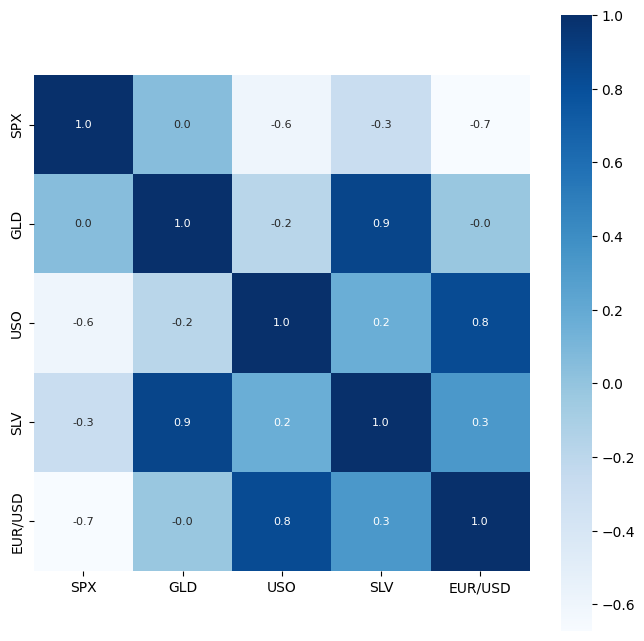

In [9]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,
           annot_kws={'size':8},cmap='Blues')

In [10]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipykernel_18/3440296056.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

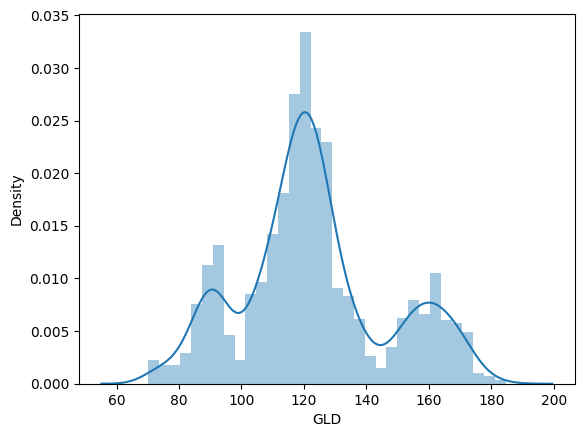

In [11]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'])

**Splitting the Features and Target**

In [12]:
X=gold_data.drop(['GLD'],axis=1)
Y=gold_data['GLD']

In [13]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Splitting into Training data and Test Data**

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

**Model Training: Random Forest Regressor**

In [16]:
regressor=RandomForestRegressor(n_estimators=100)

In [17]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

**Model Evaluation**

In [18]:
test_data_prediction=regressor.predict(X_test)

In [19]:
print(test_data_prediction)

[162.82290033 127.37460003 124.21990022 119.81919897 126.2485994
  85.34259793 171.93120226 138.91790059 106.59150011 132.55330179
 120.69649966 124.7355005  143.55549689 104.54969932  80.95319935
 120.4582     141.09860058  90.59370063  91.61549891 128.22560171
 125.44650089 148.19120069 116.8863018  151.84539922 129.24780015
 129.26070058 117.97630124 111.46550096 168.67200211 157.94119975
 126.08320205 153.71770065 126.96800011 122.52609779 116.9493012
 154.27009947 115.22889975 120.61210169 103.75390198 106.50500047
 135.37959934  86.2853998  155.63730165 121.11840029 122.51360093
 154.4886018  120.21949959 116.12330029 168.83980231 116.78600036
 139.36260164 161.84719906 158.40750064 153.47110169 124.35329987
 117.28480054 167.44260049 117.3293998  165.6277995   84.03559973
 121.419699   122.42180007 119.94890006 172.0804985  118.89069998
 180.83579501 161.3503026  141.0145021  116.55129942  92.78920053
 172.00949971 117.93239987 116.86689978 125.73020013 147.06959885
  91.5994007

In [20]:
# R squared error
error=metrics.r2_score(Y_test,test_data_prediction)

In [21]:
error

0.9865605532018419

**Compare the Actual Values and Predicted Values in a Plot**

In [22]:
Y_test=list(Y_test)

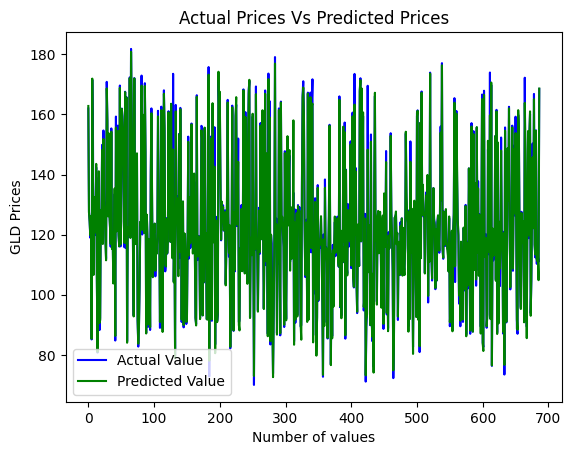

In [23]:
plt.plot(Y_test,color="blue",label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title("Actual Prices Vs Predicted Prices")
plt.xlabel("Number of values")
plt.ylabel("GLD Prices")
plt.legend()
plt.show()